In [20]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [21]:
dataset = pd.read_csv("sf18_weathermerged.csv")
dataset.head()

,Unnamed: 0,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,...,Date_e,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip
0,0,2018-01-31 22:00:00,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,...,2018-02-01,3,19,37.761420,-122.426435,37.783521,-122.431158,16.7,16.7,0.0
1,1,2018-01-31 22:00:00,2018-01-31 22:58:45,2018-02-01 00:46:42,236,160,Market St at 8th St,West Oakland BART Station,1306,Customer,...,2018-02-01,3,0,37.803686,-122.282497,37.805318,-122.294837,16.7,16.7,0.0
2,2,2018-01-31 22:00:00,2018-01-31 22:53:42,2018-01-31 23:08:22,123,145,Folsom St at 19th St,29th St at Church St,3725,Subscriber,...,2018-01-31,2,23,37.760594,-122.414817,37.743684,-122.426806,16.7,16.7,0.0
3,3,2018-01-31 22:00:00,2018-01-31 22:45:38,2018-01-31 23:05:48,285,133,Webster St at O'Farrell St,Valencia St at 22nd St,1059,Subscriber,...,2018-01-31,2,23,37.783521,-122.431158,37.755213,-122.420975,16.7,16.7,0.0
4,4,2018-01-31 22:00:00,2018-01-31 22:53:28,2018-01-31 23:03:21,202,195,Washington St at 8th St,Bay Pl at Vernon St,1834,Customer,...,2018-01-31,2,23,37.800754,-122.274894,37.812314,-122.260779,16.7,16.7,0.0


## delete all the trips without location and divide the trips into 12 months

### since their distance can´t be calculated

In [22]:
#data = dataset[['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','start_time','duration [s]']]
data_cleaned = dataset.dropna(axis=0,how='any')
data_cleaned['month']=pd.DatetimeIndex(data_cleaned['start_time']).month
#data_cleaned=data_cleaned.drop(['start_time'],axis=1)
data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.str.contains('^Unnamed')]
data_cleaned

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],...,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month
0,2018-01-31 22:00:00,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,...,3,19,37.761420,-122.426435,37.783521,-122.431158,16.7,16.7,0.0,1
1,2018-01-31 22:00:00,2018-01-31 22:58:45,2018-02-01 00:46:42,236,160,Market St at 8th St,West Oakland BART Station,1306,Customer,6477.0,...,3,0,37.803686,-122.282497,37.805318,-122.294837,16.7,16.7,0.0,1
2,2018-01-31 22:00:00,2018-01-31 22:53:42,2018-01-31 23:08:22,123,145,Folsom St at 19th St,29th St at Church St,3725,Subscriber,880.0,...,2,23,37.760594,-122.414817,37.743684,-122.426806,16.7,16.7,0.0,1
3,2018-01-31 22:00:00,2018-01-31 22:45:38,2018-01-31 23:05:48,285,133,Webster St at O'Farrell St,Valencia St at 22nd St,1059,Subscriber,1210.0,...,2,23,37.783521,-122.431158,37.755213,-122.420975,16.7,16.7,0.0,1
4,2018-01-31 22:00:00,2018-01-31 22:53:28,2018-01-31 23:03:21,202,195,Washington St at 8th St,Bay Pl at Vernon St,1834,Customer,593.0,...,2,23,37.800754,-122.274894,37.812314,-122.260779,16.7,16.7,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833011,2018-12-01 00:00:00,2018-12-01 00:11:55,2018-12-01 00:19:49,345,81,Hubbell St at 16th St,Berry St at 4th St,3035,Subscriber,474.0,...,5,0,37.766474,-122.398295,37.775880,-122.393170,15.0,15.0,0.0,12
1833012,2018-12-01 00:00:00,2018-12-01 00:02:49,2018-12-01 00:16:50,10,58,Washington St at Kearny St,Market St at 10th St,2034,Subscriber,841.0,...,5,0,37.795393,-122.404770,37.776619,-122.417385,15.0,15.0,0.0,12
1833013,2018-12-01 00:00:00,2018-12-01 00:05:28,2018-12-01 00:09:48,245,255,Downtown Berkeley BART,Virginia St at Shattuck Ave,2243,Subscriber,260.0,...,5,0,37.870348,-122.267764,37.876573,-122.269528,15.0,15.0,0.0,12
1833014,2018-12-01 00:00:00,2018-12-01 00:03:07,2018-12-01 00:08:00,93,126,4th St at Mission Bay Blvd S,Esprit Park,545,Subscriber,293.0,...,5,0,37.770407,-122.391198,37.761634,-122.390648,15.0,15.0,0.0,12


## calculate the distance

In [23]:
#function that calculates the distance of a trip by the locations of start and end stations
import numpy as np

def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [24]:
data_cleaned['distance [km]']=haversine_vectorize(data_cleaned['start_station_longitude'],data_cleaned['start_station_latitude'],data_cleaned['end_station_longitude'],data_cleaned['end_station_latitude'])
#data_cleaned=data_cleaned.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis=1)
# drop trips when distance equals 0, cause they have the same start and end stations, impossible for us to analyse
data_cleaned.drop(data_cleaned[data_cleaned["distance [km]"]<=0].index, inplace = True)
data_cleaned

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],...,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month,distance [km]
0,2018-01-31 22:00:00,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,...,19,37.761420,-122.426435,37.783521,-122.431158,16.7,16.7,0.0,1,2.490689
1,2018-01-31 22:00:00,2018-01-31 22:58:45,2018-02-01 00:46:42,236,160,Market St at 8th St,West Oakland BART Station,1306,Customer,6477.0,...,0,37.803686,-122.282497,37.805318,-122.294837,16.7,16.7,0.0,1,1.098487
2,2018-01-31 22:00:00,2018-01-31 22:53:42,2018-01-31 23:08:22,123,145,Folsom St at 19th St,29th St at Church St,3725,Subscriber,880.0,...,23,37.760594,-122.414817,37.743684,-122.426806,16.7,16.7,0.0,1,2.154200
3,2018-01-31 22:00:00,2018-01-31 22:45:38,2018-01-31 23:05:48,285,133,Webster St at O'Farrell St,Valencia St at 22nd St,1059,Subscriber,1210.0,...,23,37.783521,-122.431158,37.755213,-122.420975,16.7,16.7,0.0,1,3.270451
4,2018-01-31 22:00:00,2018-01-31 22:53:28,2018-01-31 23:03:21,202,195,Washington St at 8th St,Bay Pl at Vernon St,1834,Customer,593.0,...,23,37.800754,-122.274894,37.812314,-122.260779,16.7,16.7,0.0,1,1.784961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833011,2018-12-01 00:00:00,2018-12-01 00:11:55,2018-12-01 00:19:49,345,81,Hubbell St at 16th St,Berry St at 4th St,3035,Subscriber,474.0,...,0,37.766474,-122.398295,37.775880,-122.393170,15.0,15.0,0.0,12,1.138059
1833012,2018-12-01 00:00:00,2018-12-01 00:02:49,2018-12-01 00:16:50,10,58,Washington St at Kearny St,Market St at 10th St,2034,Subscriber,841.0,...,0,37.795393,-122.404770,37.776619,-122.417385,15.0,15.0,0.0,12,2.362164
1833013,2018-12-01 00:00:00,2018-12-01 00:05:28,2018-12-01 00:09:48,245,255,Downtown Berkeley BART,Virginia St at Shattuck Ave,2243,Subscriber,260.0,...,0,37.870348,-122.267764,37.876573,-122.269528,15.0,15.0,0.0,12,0.708836
1833014,2018-12-01 00:00:00,2018-12-01 00:03:07,2018-12-01 00:08:00,93,126,4th St at Mission Bay Blvd S,Esprit Park,545,Subscriber,293.0,...,0,37.770407,-122.391198,37.761634,-122.390648,15.0,15.0,0.0,12,0.976111


### calculate the speed

In [25]:
data_cleaned['speed [km/h]']=3600*(data_cleaned['distance [km]']/data_cleaned['duration [s]'])
data_cleaned

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],...,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month,distance [km],speed [km/h]
0,2018-01-31 22:00:00,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,...,37.761420,-122.426435,37.783521,-122.431158,16.7,16.7,0.0,1,2.490689,0.119102
1,2018-01-31 22:00:00,2018-01-31 22:58:45,2018-02-01 00:46:42,236,160,Market St at 8th St,West Oakland BART Station,1306,Customer,6477.0,...,37.803686,-122.282497,37.805318,-122.294837,16.7,16.7,0.0,1,1.098487,0.610553
2,2018-01-31 22:00:00,2018-01-31 22:53:42,2018-01-31 23:08:22,123,145,Folsom St at 19th St,29th St at Church St,3725,Subscriber,880.0,...,37.760594,-122.414817,37.743684,-122.426806,16.7,16.7,0.0,1,2.154200,8.812637
3,2018-01-31 22:00:00,2018-01-31 22:45:38,2018-01-31 23:05:48,285,133,Webster St at O'Farrell St,Valencia St at 22nd St,1059,Subscriber,1210.0,...,37.783521,-122.431158,37.755213,-122.420975,16.7,16.7,0.0,1,3.270451,9.730268
4,2018-01-31 22:00:00,2018-01-31 22:53:28,2018-01-31 23:03:21,202,195,Washington St at 8th St,Bay Pl at Vernon St,1834,Customer,593.0,...,37.800754,-122.274894,37.812314,-122.260779,16.7,16.7,0.0,1,1.784961,10.836190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833011,2018-12-01 00:00:00,2018-12-01 00:11:55,2018-12-01 00:19:49,345,81,Hubbell St at 16th St,Berry St at 4th St,3035,Subscriber,474.0,...,37.766474,-122.398295,37.775880,-122.393170,15.0,15.0,0.0,12,1.138059,8.643485
1833012,2018-12-01 00:00:00,2018-12-01 00:02:49,2018-12-01 00:16:50,10,58,Washington St at Kearny St,Market St at 10th St,2034,Subscriber,841.0,...,37.795393,-122.404770,37.776619,-122.417385,15.0,15.0,0.0,12,2.362164,10.111523
1833013,2018-12-01 00:00:00,2018-12-01 00:05:28,2018-12-01 00:09:48,245,255,Downtown Berkeley BART,Virginia St at Shattuck Ave,2243,Subscriber,260.0,...,37.870348,-122.267764,37.876573,-122.269528,15.0,15.0,0.0,12,0.708836,9.814658
1833014,2018-12-01 00:00:00,2018-12-01 00:03:07,2018-12-01 00:08:00,93,126,4th St at Mission Bay Blvd S,Esprit Park,545,Subscriber,293.0,...,37.770407,-122.391198,37.761634,-122.390648,15.0,15.0,0.0,12,0.976111,11.993176


In [26]:
data_cleaned.to_csv('sf18_weathermerged_distancemerged.csv')

## dividing the trips into different groups by their distances

### general situation

In [27]:
def distance1(dist):
    
    if (dist ==0):
     typ = 'same start& end stations'
    elif (dist >0) & (dist <=1):
     typ = '0-1km'
    elif (dist >1) & (dist <=3):
     typ = '1-3km'
    elif (dist >3) & (dist <=5):
     typ = '3-5km'
    elif dist >5:
     typ = 'longer than 5km'
    
    return typ

In [28]:
#sort_distance['group']=sort_distance['distance'].apply(distance1)
#sort_distance
data_cleaned['group_general']=data_cleaned['distance [km]'].apply(distance1)
data_cleaned

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],...,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month,distance [km],speed [km/h],group_general
0,2018-01-31 22:00:00,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,...,-122.426435,37.783521,-122.431158,16.7,16.7,0.0,1,2.490689,0.119102,1-3km
1,2018-01-31 22:00:00,2018-01-31 22:58:45,2018-02-01 00:46:42,236,160,Market St at 8th St,West Oakland BART Station,1306,Customer,6477.0,...,-122.282497,37.805318,-122.294837,16.7,16.7,0.0,1,1.098487,0.610553,1-3km
2,2018-01-31 22:00:00,2018-01-31 22:53:42,2018-01-31 23:08:22,123,145,Folsom St at 19th St,29th St at Church St,3725,Subscriber,880.0,...,-122.414817,37.743684,-122.426806,16.7,16.7,0.0,1,2.154200,8.812637,1-3km
3,2018-01-31 22:00:00,2018-01-31 22:45:38,2018-01-31 23:05:48,285,133,Webster St at O'Farrell St,Valencia St at 22nd St,1059,Subscriber,1210.0,...,-122.431158,37.755213,-122.420975,16.7,16.7,0.0,1,3.270451,9.730268,3-5km
4,2018-01-31 22:00:00,2018-01-31 22:53:28,2018-01-31 23:03:21,202,195,Washington St at 8th St,Bay Pl at Vernon St,1834,Customer,593.0,...,-122.274894,37.812314,-122.260779,16.7,16.7,0.0,1,1.784961,10.836190,1-3km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833011,2018-12-01 00:00:00,2018-12-01 00:11:55,2018-12-01 00:19:49,345,81,Hubbell St at 16th St,Berry St at 4th St,3035,Subscriber,474.0,...,-122.398295,37.775880,-122.393170,15.0,15.0,0.0,12,1.138059,8.643485,1-3km
1833012,2018-12-01 00:00:00,2018-12-01 00:02:49,2018-12-01 00:16:50,10,58,Washington St at Kearny St,Market St at 10th St,2034,Subscriber,841.0,...,-122.404770,37.776619,-122.417385,15.0,15.0,0.0,12,2.362164,10.111523,1-3km
1833013,2018-12-01 00:00:00,2018-12-01 00:05:28,2018-12-01 00:09:48,245,255,Downtown Berkeley BART,Virginia St at Shattuck Ave,2243,Subscriber,260.0,...,-122.267764,37.876573,-122.269528,15.0,15.0,0.0,12,0.708836,9.814658,0-1km
1833014,2018-12-01 00:00:00,2018-12-01 00:03:07,2018-12-01 00:08:00,93,126,4th St at Mission Bay Blvd S,Esprit Park,545,Subscriber,293.0,...,-122.391198,37.761634,-122.390648,15.0,15.0,0.0,12,0.976111,11.993176,0-1km


In [29]:
group_general=data_cleaned['group_general'].value_counts()
df_group_general=pd.DataFrame(group_general).sort_index()
df_group_general

,group_general
0-1km,533594
1-3km,1076134
3-5km,166858
longer than 5km,14464


array([<AxesSubplot:ylabel='group_general'>], dtype=object)

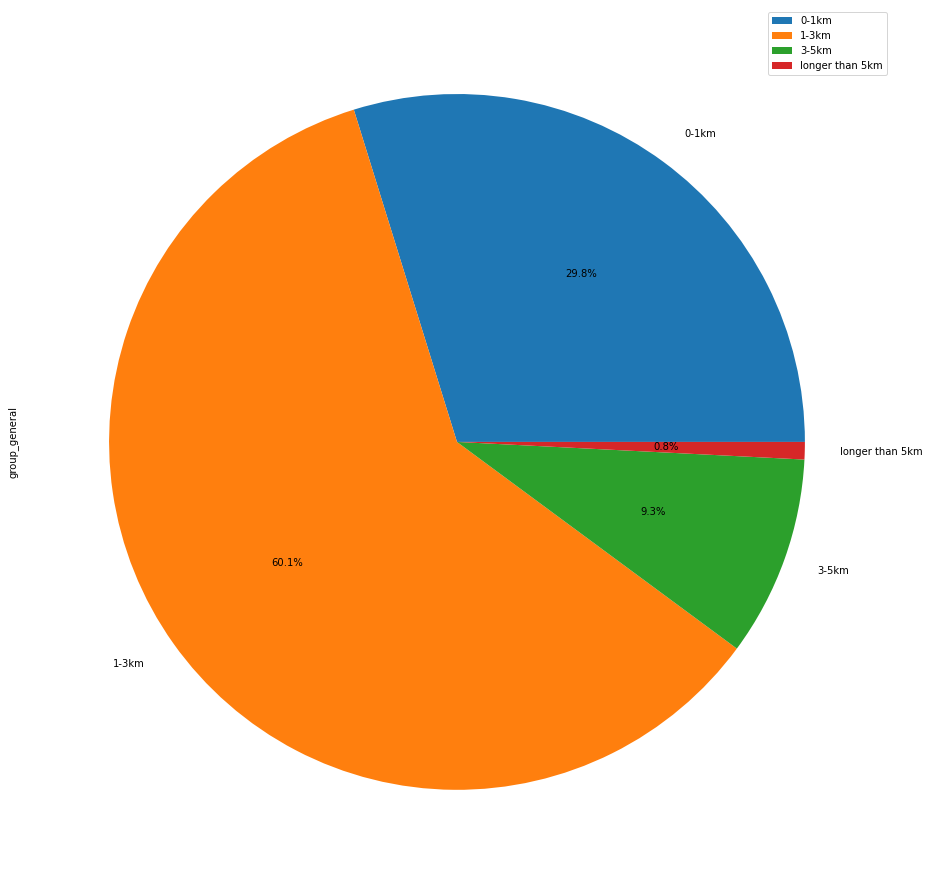

In [30]:
pie_ch=df_group_general.plot.pie(subplots=True,y='group_general', figsize=(16,16),autopct='%1.1f%%')
pie_ch